In [60]:
# import pandas and other libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
#import casual inference libraries
from sklearn.linear_model import LogisticRegression
from causalinference import CausalModel


In [73]:
#get working directory
import os
os.getcwd()
#get csv file from working directory
os.listdir()
#load csv file
data = pd.read_csv('NSICU_database_HDN.csv')
# Define the columns you want to keep
columns_to_keep = ['CF1', 'CF2', 'CF3', 'CF4', 'CF5', 'CF6', 'CF7', 
                   'PN1', 'PN2', 'PN3', 'PN4', 'PN5', 'PN6', 'PN7',
                   'TF1', 'TF2', 'TF3', 'TF4', 'TF5', 'TF6', 'TF7']

# Filter the DataFrame to only include these columns
data_filtered = data_filtered[columns_to_keep]


In [74]:
# Define the treatment, covariates, and outcome variables
treatment = 'TF1'  # Assuming TF1 is the treatment variable
covariates = ['CF1', 'CF2', 'CF3', 'CF4', 'CF5', 'CF6', 'CF7']  # List of covariates
outcome = 'PN1'  # Assuming PN1 is the outcome variable


In [75]:
#printing the shape to see dimensions of the data
print(data_filtered.shape)

(1353, 21)


In [76]:
# Fit a logistic regression model to estimate the propensity scores
logit = LogisticRegression()
logit.fit(data_filtered[covariates], data_filtered[treatment])

LogisticRegression()

In [77]:
# Predict the propensity scores
data_filtered['propensity_score'] = logit.predict_proba(data_filtered[covariates])[:,1]

In [78]:
# Perform propensity score matching
causal = CausalModel(
    Y=data_filtered[outcome].values, 
    D=data_filtered[treatment].values, 
    X=data_filtered['propensity_score'].values
)

In [79]:
#adjust for biases
causal.est_via_matching(bias_adj=True)  

C:\Users\njmik\AppData\Roaming\Python\Python311\site-packages\causalinference\estimators\matching.py:100: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(X, Y)[0][1:]  # don't need intercept coef



Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE      0.003      0.054      0.058      0.954     -0.102      0.109
           ATC      0.002      0.054      0.046      0.963     -0.103      0.108
           ATT      0.023      0.053      0.425      0.671     -0.082      0.127



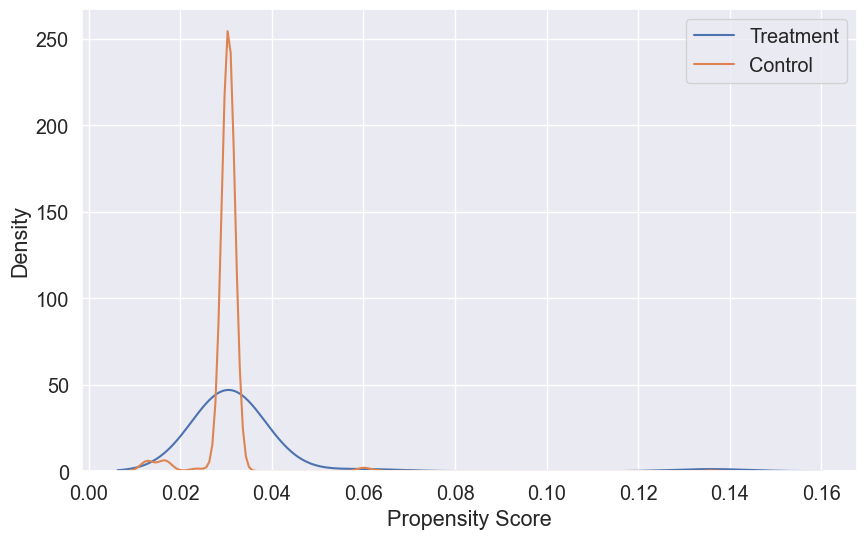

In [85]:
# Print the estimated Average Treatment Effect (ATE)
print(causal.estimates) 
# Plot the propensity scores
plt.figure(figsize=(10, 6))
sns.kdeplot(data_filtered[data_filtered[treatment] == 1]['propensity_score'], label='Treatment')
sns.kdeplot(data_filtered[data_filtered[treatment] == 0]['propensity_score'], label='Control')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
#put in a legend
plt.legend()
plt.show()